In [12]:
import sqlite3
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

In [15]:
data = [
    ('Apple', 10, 20.0),
    ('Banana', 15, 10.0),
    ('Orange', 8, 25.0),
    ('Apple', 5, 20.0),
    ('Banana', 7, 10.0)
]
cursor.executemany('INSERT INTO sales VALUES (?, ?, ?)', data)
conn.commit()

In [22]:
import pandas as pd

query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)
print(df)

  product  total_qty  total_revenue
0   Apple         30          600.0
1  Banana         44          440.0
2  Orange         16          400.0


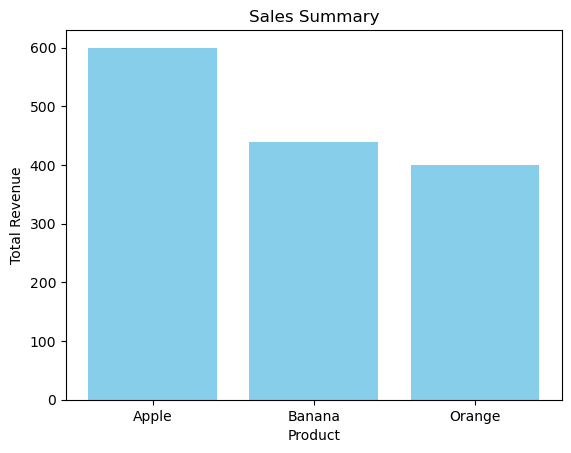

In [24]:
import matplotlib.pyplot as plt

plt.bar(df['product'], df['total_revenue'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.title('Sales Summary')
plt.show()

In [26]:
conn.close()